In [15]:
from sklearn.linear_model import LinearRegression
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

model = LinearRegression()
x = np.array([10,8, 13, 9,11,14, 6,4,12, 7,5])
y = np.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68 ])
x = x.reshape(-1,1)




In [4]:
def linear(iks, b0, b1):
    return b0+iks*b1

In [16]:
model.fit(x,y)
b0 = model.intercept_
b1 = model.coef_
print(b0,b1)

3.0000909090909094 [0.50009091]


In [17]:
model.score(x,y)


0.6665424595087748

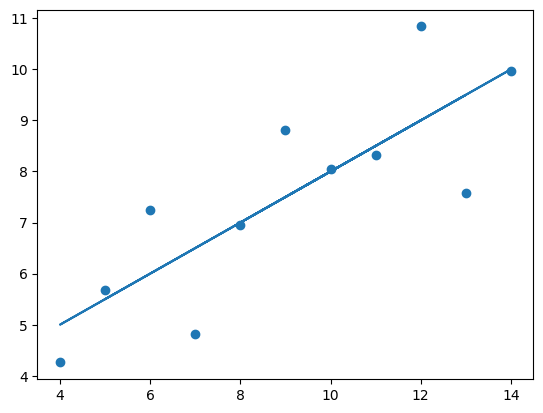

In [19]:
plt.scatter(x,y)
plt.plot(x, linear(x,b0,b1));

In [23]:
preds = model.predict(x)

rems = y-preds
rems

array([ 0.039     , -0.05081818, -1.92127273,  1.30909091, -0.17109091,
       -0.04136364,  1.23936364, -0.74045455,  1.83881818, -1.68072727,
        0.17945455])

In [37]:
preds


array([ 8.001     ,  7.00081818,  9.50127273,  7.50090909,  8.50109091,
       10.00136364,  6.00063636,  5.00045455,  9.00118182,  6.50072727,
        5.50054545])

In [24]:
stats.shapiro(rems)

ShapiroResult(statistic=0.9421076774597168, pvalue=0.5455849170684814)

Условие применимости о нормальном распределении остатков выполняется

Text(0, 0.5, 'остатки')

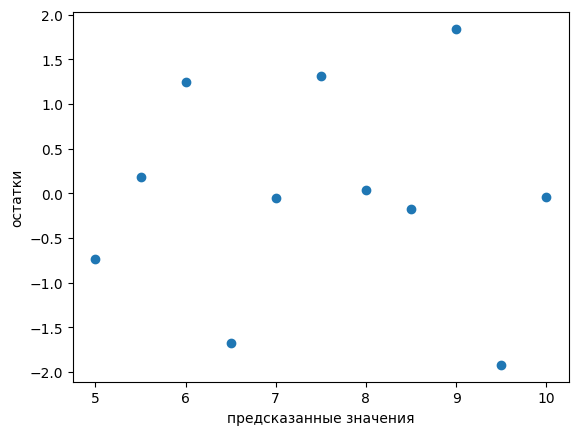

In [29]:
plt.scatter(preds,rems)
plt.xlabel("предсказанные значения")
plt.ylabel("остатки")

In [32]:
sred = np.mean(y)
sred

7.500909090909093

In [33]:
SSf = np.sum((preds - sred)**2)
SSf

27.510000909090927

In [34]:
SSo = np.sum((y - preds)**2)
SSo

13.762690000000003

In [35]:
#по числу признаков p=2 (x и y)
df1 = 2-1
#по числу измерений n
df2 = len(y) - 2
Fish = (SSf/df1)/(SSo/df2)
Fish

17.98994296767698

In [36]:
alpha = 0.05
stats.f.ppf(1-alpha, df1,df2)


5.117355029199227

Так как расчетный криттерий > критическое значение, значит верна альтернативная гипотеза о статистичеки значимой модели линейной регрессии.

In [39]:

sigmas = 1 /(1+2.72**(-preds))
sigmas

array([0.99966667, 0.99909371, 0.9999257 , 0.99945033, 0.99979788,
       0.99995495, 0.99753827, 0.99333113, 0.99987745, 0.99850605,
       0.99594613])